<a href="https://colab.research.google.com/github/unyime1/ai-fashion-classifier/blob/main/classification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A deep neural network to classify items in the MINST fashion dataset
https://github.com/zalandoresearch/fashion-mnist

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# split datasets to train and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# list of classification names for indexing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# show a training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# shape of a training example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Text(0.5, 1.0, 'Dress')

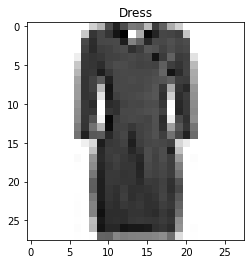

In [6]:
# visualize training sample
index = 9000
plt.imshow(train_data[index], cmap=plt.cm.binary);
plt.title(class_names[train_labels[index]])

In [7]:
# show random images of training sample
def get_random_data():
  plt.figure(figsize=(7,7))
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

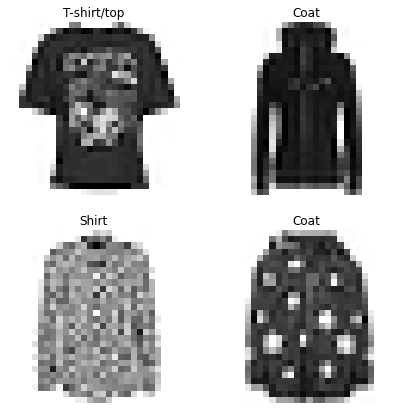

In [8]:
get_random_data()

## Build a neural network classification model with:
1. Input shape = 28 x 28 (the shape of MINST sample image)
2. Output shape = 10 (corresponds to one per class of clothing)
3. Loss Function = tf.keras.losses.CategoricalCrossentropy() if labels is onehot encoded else use SparseCategoricalCrossentropy()
4. Output layer activation = softmax(ideal for multiclassification instead of sigmoid which is ideal for binary classification)

In [9]:
# set random seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Flatten(
    input_shape=(28,28))),  # flatten data to linear vector
model.add(tf.keras.layers.Dense(
    units=4, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(
    units=4, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(
    units=10, activation=tf.keras.activations.softmax))

# compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# train model on training data
history = model.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=100,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)


Epoch 1/100
1875/1875 [==============================] - 9s 3ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_ac

### Our model is currently able to classify with an accuracy of 34%. Let's see if we can improve accuracy by normalising data

In [10]:
# get the maximum and minimum values of training data
train_data.min(), train_data.max()

(0, 255)

In [11]:
# normalize data by dividing by max
train_data_norm = train_data / 255
test_data_norm = test_data / 255

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [12]:
# create and train second model with normalised data
# set random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential()

# add layers
model_1.add(tf.keras.layers.Flatten(
    input_shape=(28,28))),  # flatten data to linear vector
model_1.add(tf.keras.layers.Dense(
    units=4, activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(
    units=4, activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(
    units=10, activation=tf.keras.activations.softmax))

# compile model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# train model on training data
history_1 = model_1.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=100,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))
)


Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

### Normalization of input data increases classification accuracy to 81%

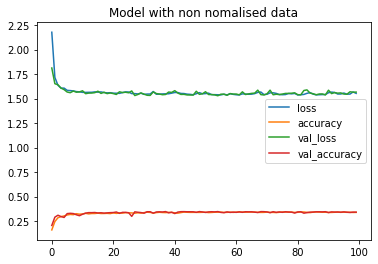

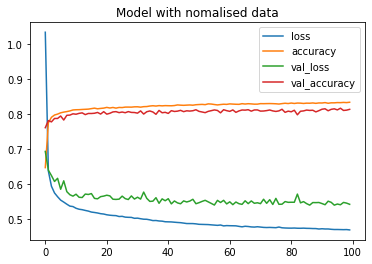

In [14]:
# plot loss curves

pd.DataFrame(history.history).plot(title="Model with non nomalised data")
pd.DataFrame(history_1.history).plot(title="Model with nomalised data")